There did not appear to be much correlation in my paces over time, however I did see an increase in runs at lower pace zones. I am curious if there is any statistically significant difference in (1) my overall pace between 2023 and 2024, and (2) my overall pace for runs average heart rates in the different zones.

### Hypothesis testing on the overall pace between 2023 and 2024 (Only using runs from the same time period, i.e. runs in 2023 and 2024 from 01-Jan to 22-Aug)

In [138]:
# import packages and datasets
import pandas as pd
import numpy as np
import datetime
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from process_strava_data import load_run_data
%matplotlib inline

In [139]:
# load running dataset
runs_df = load_run_data()
runs_df.head()
runs_df.shape

(192, 20)

In [140]:
# filter runs by year and extract the average pace for each run
cutoff_date_2023 = datetime.datetime.now() - datetime.timedelta(days=365)
runs_df['avg_pace_s'] = runs_df['moving_time_s'] / runs_df['distance_mi']
avg_paces_2023 = runs_df[(runs_df['year'] == 2023) & (runs_df['date'] <= cutoff_date_2023)]['avg_pace_s']
avg_paces_2024 = runs_df[runs_df['year'] == 2024]['avg_pace_s']

print(f'Overall average pace in seconds in 2023: {avg_paces_2023.mean()}')
print(f'Overall average pace in seconds in 2024: {avg_paces_2024.mean()}')

Overall average pace in seconds in 2023: 511.4082034505275
Overall average pace in seconds in 2024: 524.6229290141899


Checking assumptions for a 2-sample t-test:
1. Independent samples - this assumption may not be fully met as previous runs may influence future runs (i.e. a long run on a sunday may cause a slower pace if another run is done the next day or the day after. We will still continue with the hypothesis testing despite this though. 

2. Normal distributions - Both the 2023 and 2024 average run paces do appear to follow an approximate normal distribution.

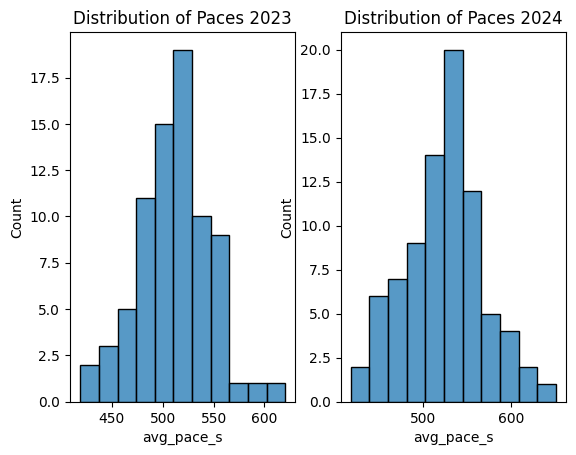

In [141]:
# plot pace distrubutions for 2023 and 2024 runs
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.histplot(avg_paces_2023, ax=ax1)
ax1.set_title('Distribution of Paces 2023')
sns.histplot(avg_paces_2024, ax=ax2)
ax2.set_title('Distribution of Paces 2024')

plt.show()

3. Homogeneity assumption - This assumption appears to be met as the ratio of the average pace variance for 2023 and 2024 is less than 4:1 so we will consider that the given data groups have equal variance.

In [142]:
print(f'2023 variance: {np.var(avg_paces_2023)}\n2024 variance: {np.var(avg_paces_2024)}')

2023 variance: 1264.162193298281
2024 variance: 1952.2820565967343


### Conducting the Hypothesis Test on the Overall Average Paces for the Years 2023 and 2024
$H_0$: $\mu_{2024}$ = $\mu_{2023}$ - The average pace in 2024 is equal to the average pace in 2023.

$H_A$: $\mu_{2024}$ < $\mu_{2023}$ - The average pace in 2024 is less than the average pace in 2023 (i.e. my average pace is faster in 2024).

In [143]:
stats.ttest_ind(avg_paces_2024, avg_paces_2023, alternative='less', equal_var=True)

TtestResult(statistic=np.float64(2.0565256590129026), pvalue=np.float64(0.979306465104414), df=np.float64(157.0))

The p-value of 0.979 is much greater than our alpha of 0.05, which suggests that we have failed to reject the null hypothesis. Thus we cannot say that my overall average pace in 2024 is less than my overall average pace in 2023.

### Conducting the Hypothesis Test on the Zone 2 Average Paces for the Years 2023 and 2024

In [144]:
avg_zone2_paces_2023 = runs_df[(runs_df['year'] == 2023) & (runs_df['date'] <= cutoff_date_2023) & (runs_df['average_zone'] == 2)]['avg_pace_s']
avg_zone2_paces_2024 = runs_df[(runs_df['year'] == 2024) & (runs_df['average_zone'] == 2)]['avg_pace_s']
print(f'Zone 2 average pace in seconds in 2023: {avg_zone2_paces_2023.mean()}')
print(f'Zone 2 average pace in seconds in 2024: {avg_zone2_paces_2024.mean()}')
print(f'2023 zone 2 variance: {np.var(avg_zone2_paces_2023)}\n2024 zone 2 variance: {np.var(avg_zone2_paces_2024)}')

Zone 2 average pace in seconds in 2023: 519.2826509468331
Zone 2 average pace in seconds in 2024: 534.302749360721
2023 zone 2 variance: 1744.1510305944837
2024 zone 2 variance: 2704.285060425006


$H_0$: $\mu_{2024}$ = $\mu_{2023}$ - The average zone 2 pace in 2024 is equal to the average zone 2 pace in 2023.

$H_A$: $\mu_{2024}$ < $\mu_{2023}$ - The average zone 2 pace in 2024 is less than the average zone 2 pace in 2023 (i.e. my average pace is faster in 2024).

In [145]:
stats.ttest_ind(avg_zone2_paces_2024, avg_zone2_paces_2023, alternative='less', equal_var=True)

TtestResult(statistic=np.float64(0.9972091162402668), pvalue=np.float64(0.8380023641371901), df=np.float64(45.0))

The p-value of 0.838 is much greater than our alpha of 0.05, which suggests that we have failed to reject the null hypothesis. Thus we cannot say that my average zone 2 pace in 2024 is less than my average zone 2 pace in 2023.

### Conducting the Hypothesis Test on the Zone 3 Average Paces for the Years 2023 and 2024

In [146]:
avg_zone3_paces_2023 = runs_df[(runs_df['year'] == 2023) & (runs_df['date'] <= cutoff_date_2023) & (runs_df['average_zone'] == 3)]['avg_pace_s']
avg_zone3_paces_2024 = runs_df[(runs_df['year'] == 2024) & (runs_df['average_zone'] == 3)]['avg_pace_s']
print(f'Zone 3 average pace in seconds in 2023: {avg_zone3_paces_2023.mean()}')
print(f'Zone 3 average pace in seconds in 2024: {avg_zone3_paces_2024.mean()}')
print(f'2023 zone 3 variance: {np.var(avg_zone3_paces_2023)}\n2024 zone 3 variance: {np.var(avg_zone3_paces_2024)}')

Zone 3 average pace in seconds in 2023: 511.52800915076324
Zone 3 average pace in seconds in 2024: 522.3853135056125
2023 zone 3 variance: 1120.6717208477605
2024 zone 3 variance: 1111.7439325563162


$H_0$: $\mu_{2024}$ = $\mu_{2023}$ - The average zone 3 pace in 2024 is equal to the average zone 3 pace in 2023.

$H_A$: $\mu_{2024}$ < $\mu_{2023}$ - The average zone 3 pace in 2024 is less than the average zone 3 pace in 2023 (i.e. my average pace is faster in 2024).

In [147]:
stats.ttest_ind(avg_zone3_paces_2024, avg_zone3_paces_2023, alternative='less', equal_var=True)

TtestResult(statistic=np.float64(1.5596278964015193), pvalue=np.float64(0.938877756956959), df=np.float64(93.0))

The p-value of 0.939 is much greater than our alpha of 0.05, which suggests that we have failed to reject the null hypothesis. Thus we cannot say that my average zone 3 pace in 2024 is less than my average zone 3 pace in 2023.

### Conducting the Hypothesis Test on the Zone 4 Average Paces for the Years 2023 and 2024

In [148]:
avg_zone4_paces_2023 = runs_df[(runs_df['year'] == 2023) & (runs_df['date'] <= cutoff_date_2023) & (runs_df['average_zone'] == 4)]['avg_pace_s']
avg_zone4_paces_2024 = runs_df[(runs_df['year'] == 2024) & (runs_df['average_zone'] == 4)]['avg_pace_s']
print(f'Zone 4 average pace in seconds in 2023: {avg_zone4_paces_2023.mean()}')
print(f'Zone 4 average pace in seconds in 2024: {avg_zone4_paces_2024.mean()}')
print(f'2023 zone 4 variance: {np.var(avg_zone4_paces_2023)}\n2024 zone 4 variance: {np.var(avg_zone4_paces_2024)}')

Zone 4 average pace in seconds in 2023: 499.1881902680862
Zone 4 average pace in seconds in 2024: 491.25759956849515
2023 zone 4 variance: 619.7905454668952
2024 zone 4 variance: 1741.1817612365248


$H_0$: $\mu_{2024}$ = $\mu_{2023}$ - The average zone 4 pace in 2024 is equal to the average zone 4 pace in 2023.

$H_A$: $\mu_{2024}$ < $\mu_{2023}$ - The average zone 4 pace in 2024 is less than the average zone 4 pace in 2023 (i.e. my average pace is faster in 2024).

In [149]:
stats.ttest_ind(avg_zone4_paces_2024, avg_zone4_paces_2023, alternative='less', equal_var=True)

TtestResult(statistic=np.float64(-0.4087711518165805), pvalue=np.float64(0.3446807654483698), df=np.float64(13.0))

The p-value of 0.345 is greater than our alpha of 0.05, which suggests that we have failed to reject the null hypothesis. Thus we cannot say that my average zone 4 pace in 2024 is less than my average zone 4 pace in 2023.

There does not appear to be any statistically significant results that would indicate that my running in 2024 is faster than my running in 2023 thus far in 2024. 